In [1]:
from glob import glob
import numpy as np
import pandas as pd
import datetime
import time

from glob import glob
import matplotlib.pyplot as plt
from config import *
from binance.client import Client
from BinanceFuturesPy.futurespy import Client as cf

client = Client(api_key, api_secret)
clientf = cf(api_key, api_secret)# , testnet=True)

In [104]:
csv = glob("d*bo*.csv")
csv

['data_book.csv',
 'data_book_21_09_2021_07_53_56.csv',
 'data_book_21_09_2021_09_35_43.csv',
 'data_book_21_09_2021_10_45_19.csv',
 'data_book_21_09_2021_12_33_06.csv',
 'data_book_21_09_2021_20_27_36.csv',
 'data_book_21_09_2021_21_43_23.csv',
 'data_book_22_09_2021_06_58_13.csv']

In [133]:
df = pd.read_csv(csv[-1], sep="|", low_memory=False, parse_dates=[0], index_col =0)
df.index = pd.DatetimeIndex(pd.to_datetime(df.index, unit='ms')).tz_localize('UTC').tz_convert('America/Lima')
df = df.dropna()
df

,stdb_10,stda_10,volb_10,volba_10,stdb_500,stda_500,volb_500,volba_500
dtime,,,,,,,,
2021-09-22 06:58:16.557000-05:00,673398754.4,156287850.2,0.632,1.000,5.178452e+09,5.117119e+09,16.050,24.004
2021-09-22 06:58:16.446000-05:00,679933589.8,167180391.5,0.775,1.000,5.171283e+09,5.114822e+09,16.137,27.011
2021-09-22 06:58:17.317000-05:00,700458047.4,107529746.7,0.632,1.095,5.167626e+09,5.038919e+09,15.900,23.584
2021-09-22 06:58:18.919000-05:00,712647863.6,140202287.0,0.775,1.183,5.161969e+09,5.057674e+09,16.523,24.067
2021-09-22 06:58:19.926000-05:00,758809958.7,130484187.8,0.632,1.000,5.219732e+09,5.047353e+09,16.498,24.232
...,...,...,...,...,...,...,...,...
2021-09-22 07:37:29.467000-05:00,121868494.4,431385589.5,0.447,0.632,5.407567e+09,5.927773e+09,25.616,14.581
2021-09-22 07:37:29.822000-05:00,115770947.6,327304621.7,0.447,0.632,5.486035e+09,5.840904e+09,25.346,14.367
2021-09-22 07:37:30.170000-05:00,149202233.4,349760920.3,0.447,1.000,5.485050e+09,5.737083e+09,25.144,15.251


In [129]:
L3m = client.futures_historical_klines(symbol='BTCUSDT',
                      interval=client.KLINE_INTERVAL_15MINUTE,
                      # start_str=date,
                       start_str = str(df.index[0]),
                       end_str= str(df.index[-1])
                      # start_str='2021-07-01 02:00:00',
                      # end_str='2021-07-07 02:00:00',
                      # start_str='2021-09-06 22:00:00',
                      # end_str='2021-09-12 09:00:00',
                      # end_str='2021-09-13 09:00:00',
                      #limit=1500
                                      )

In [130]:
L3m

[[1632260700000,
  '41750.75',
  '41948.00',
  '41321.78',
  '41366.68',
  '8044.747',
  1632261599999,
  '334667745.82021',
  75160,
  '3672.656',
  '152842089.54271',
  '0'],
 [1632261600000,
  '41366.70',
  '41589.98',
  '41240.00',
  '41456.63',
  '5501.771',
  1632262499999,
  '227786903.33467',
  55843,
  '3036.923',
  '125761682.20293',
  '0'],
 [1632262500000,
  '41455.40',
  '41641.00',
  '41012.53',
  '41174.33',
  '7370.696',
  1632263399999,
  '304353448.06996',
  63560,
  '3337.569',
  '137880036.89931',
  '0'],
 [1632263400000,
  '41174.27',
  '41275.11',
  '40860.40',
  '41038.50',
  '8011.701',
  1632264299999,
  '328671881.76717',
  67298,
  '4143.088',
  '170018866.07410',
  '0'],
 [1632264300000,
  '41038.50',
  '41104.60',
  '40466.00',
  '40519.37',
  '7482.171',
  1632265199999,
  '305027222.55727',
  65716,
  '3098.680',
  '126359902.74382',
  '0'],
 [1632265200000,
  '40519.38',
  '41060.00',
  '40410.01',
  '40802.12',
  '9587.676',
  1632266099999,
  '39033119

In [109]:
cs = np.array(df.columns).reshape(-1, 4)
# cs
sp = 90
sp = 60
data_10 = df[cs[0]].resample(f"{sp}s").sum()
data_500 = df[cs[1]].resample(f"{sp}s").sum()

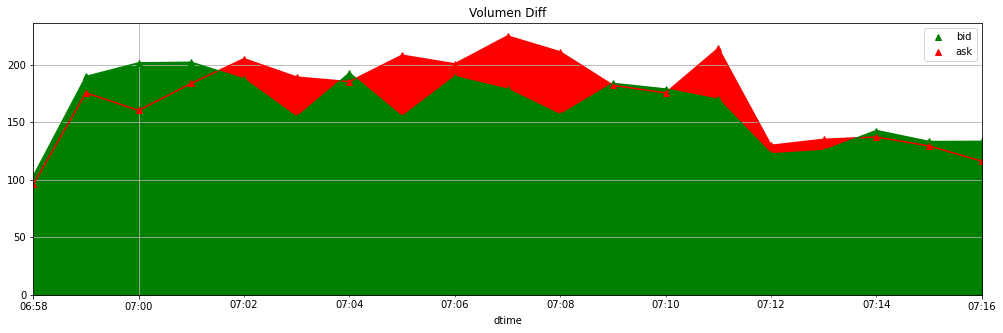

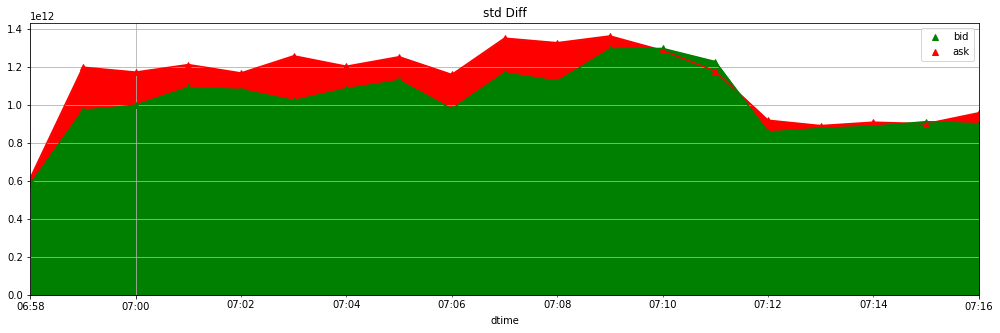

In [110]:
ll = int(data_10.shape[0]*.0)
# nk = 
fig = plt.figure(figsize=(17, 5))
data_10['volb_10'][ll:-1].plot(color='green', style="^")
data_10['volba_10'][ll:-1].plot(color='red', style="^")
data_10['volba_10'][ll:-1].plot(color='red', kind='area')
data_10['volb_10'][ll:-1].plot(color='green', kind='area')
# data['stda'][:-1].plot(color='red')
# data['stdb'][:-1].plot(color='green')
plt.title("Volumen Diff")
plt.legend(['bid', "ask"])
# plt.ylim([0, 44000])
plt.grid()

fig = plt.figure(figsize=(17, 5))
data_500['stdb_500'][ll:-1].plot(color='green', style="^")
data_500['stda_500'][ll:-1].plot(color='red', style="^")
data_500['stda_500'][ll:-1].plot(color='red', kind='area')
data_500['stdb_500'][ll:-1].plot(color='green', kind='area')
# data['stda'][:-1].plot(color='red')
# data['stdb'][:-1].plot(color='green')
plt.title("std Diff")
plt.legend(['bid', "ask"])
# plt.ylim([0, 44000])
plt.grid()

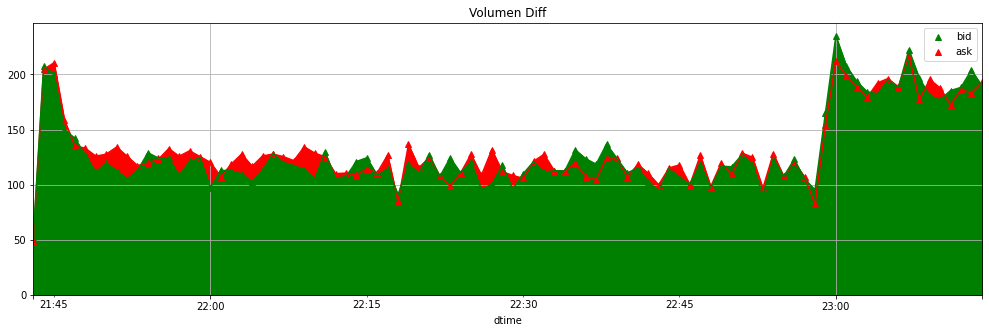

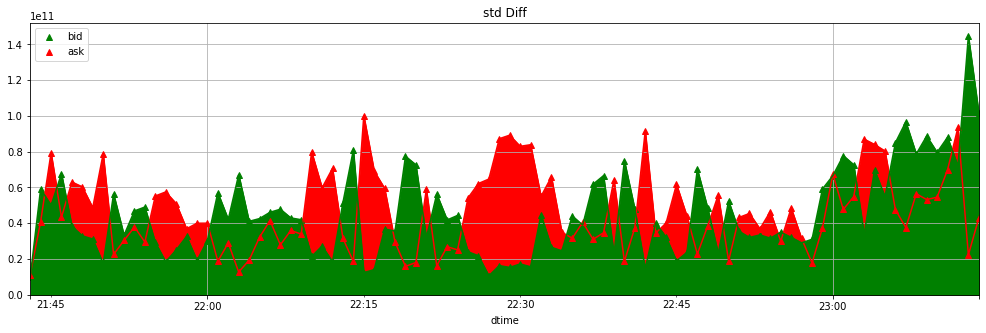

In [92]:
ll = int(data_10.shape[0]*.0)
# nk = 
fig = plt.figure(figsize=(17, 5))
data_10['volb_10'][ll:-1].plot(color='green', style="^")
data_10['volba_10'][ll:-1].plot(color='red', style="^")
data_10['volba_10'][ll:-1].plot(color='red', kind='area')
data_10['volb_10'][ll:-1].plot(color='green', kind='area')
# data['stda'][:-1].plot(color='red')
# data['stdb'][:-1].plot(color='green')
plt.title("Volumen Diff")
plt.legend(['bid', "ask"])
# plt.ylim([0, 44000])
plt.grid()

fig = plt.figure(figsize=(17, 5))
data_10['stdb_10'][ll:-1].plot(color='green', style="^")
data_10['stda_10'][ll:-1].plot(color='red', style="^")
data_10['stda_10'][ll:-1].plot(color='red', kind='area')
data_10['stdb_10'][ll:-1].plot(color='green', kind='area')
# data['stda'][:-1].plot(color='red')
# data['stdb'][:-1].plot(color='green')
plt.title("std Diff")
plt.legend(['bid', "ask"])
# plt.ylim([0, 44000])
plt.grid()

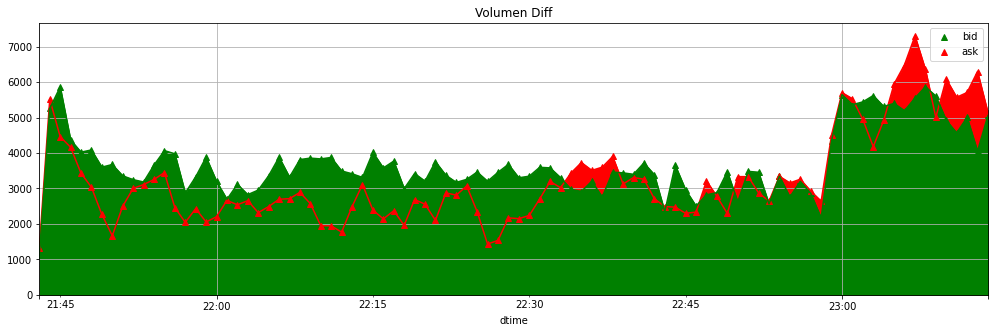

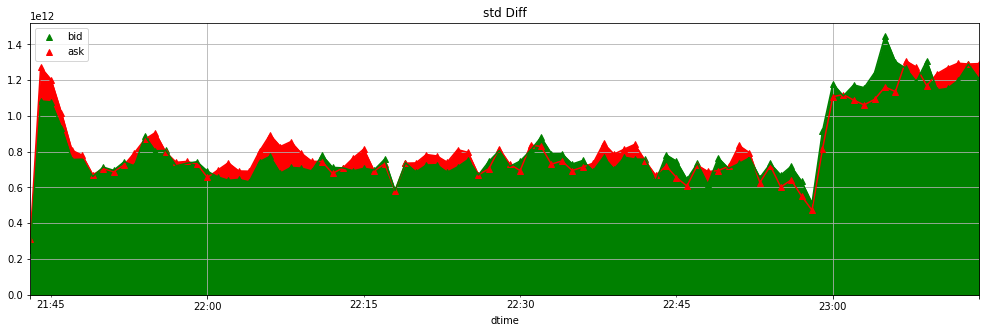

In [93]:
ll = int(data_10.shape[0]*.0)
# nk = 
fig = plt.figure(figsize=(17, 5))
data_500['volb_500'][ll:-1].plot(color='green', style="^")
data_500['volba_500'][ll:-1].plot(color='red', style="^")
data_500['volba_500'][ll:-1].plot(color='red', kind='area')
data_500['volb_500'][ll:-1].plot(color='green', kind='area')
# data['stda'][:-1].plot(color='red')
# data['stdb'][:-1].plot(color='green')
plt.title("Volumen Diff")
plt.legend(['bid', "ask"])
# plt.ylim([0, 44000])
plt.grid()

fig = plt.figure(figsize=(17, 5))
data_500['stdb_500'][ll:-1].plot(color='green', style="^")
data_500['stda_500'][ll:-1].plot(color='red', style="^")
data_500['stda_500'][ll:-1].plot(color='red', kind='area')
data_500['stdb_500'][ll:-1].plot(color='green', kind='area')
# data['stda'][:-1].plot(color='red')
# data['stdb'][:-1].plot(color='green')
plt.title("std Diff")
plt.legend(['bid', "ask"])
# plt.ylim([0, 44000])
plt.grid()